# Regression Project

## by OPTIMUM
***


In [1]:
from IPython.display import Image # 사진을 출력해주는 라이브러리

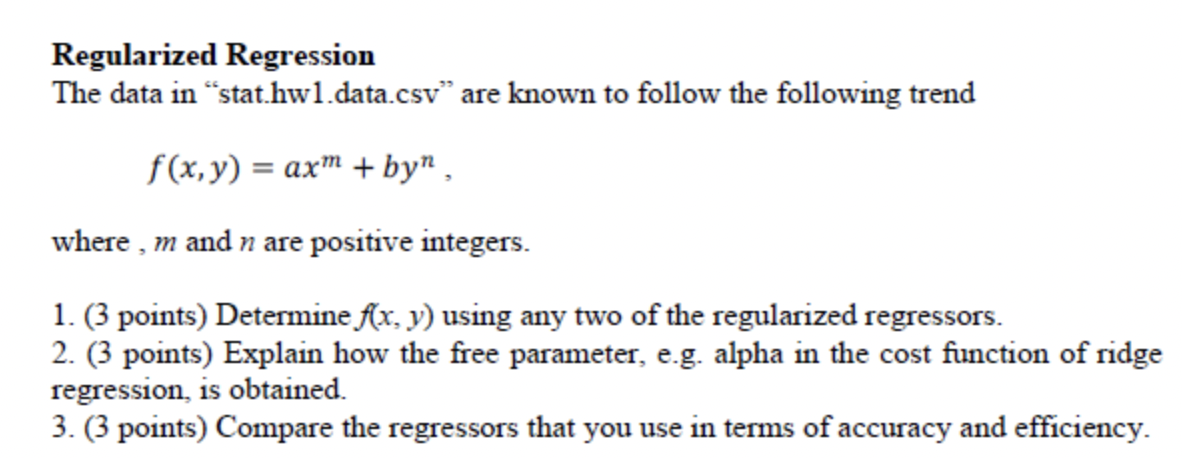

In [2]:
Image('스크린샷 2021-06-08 00.21.17.png')

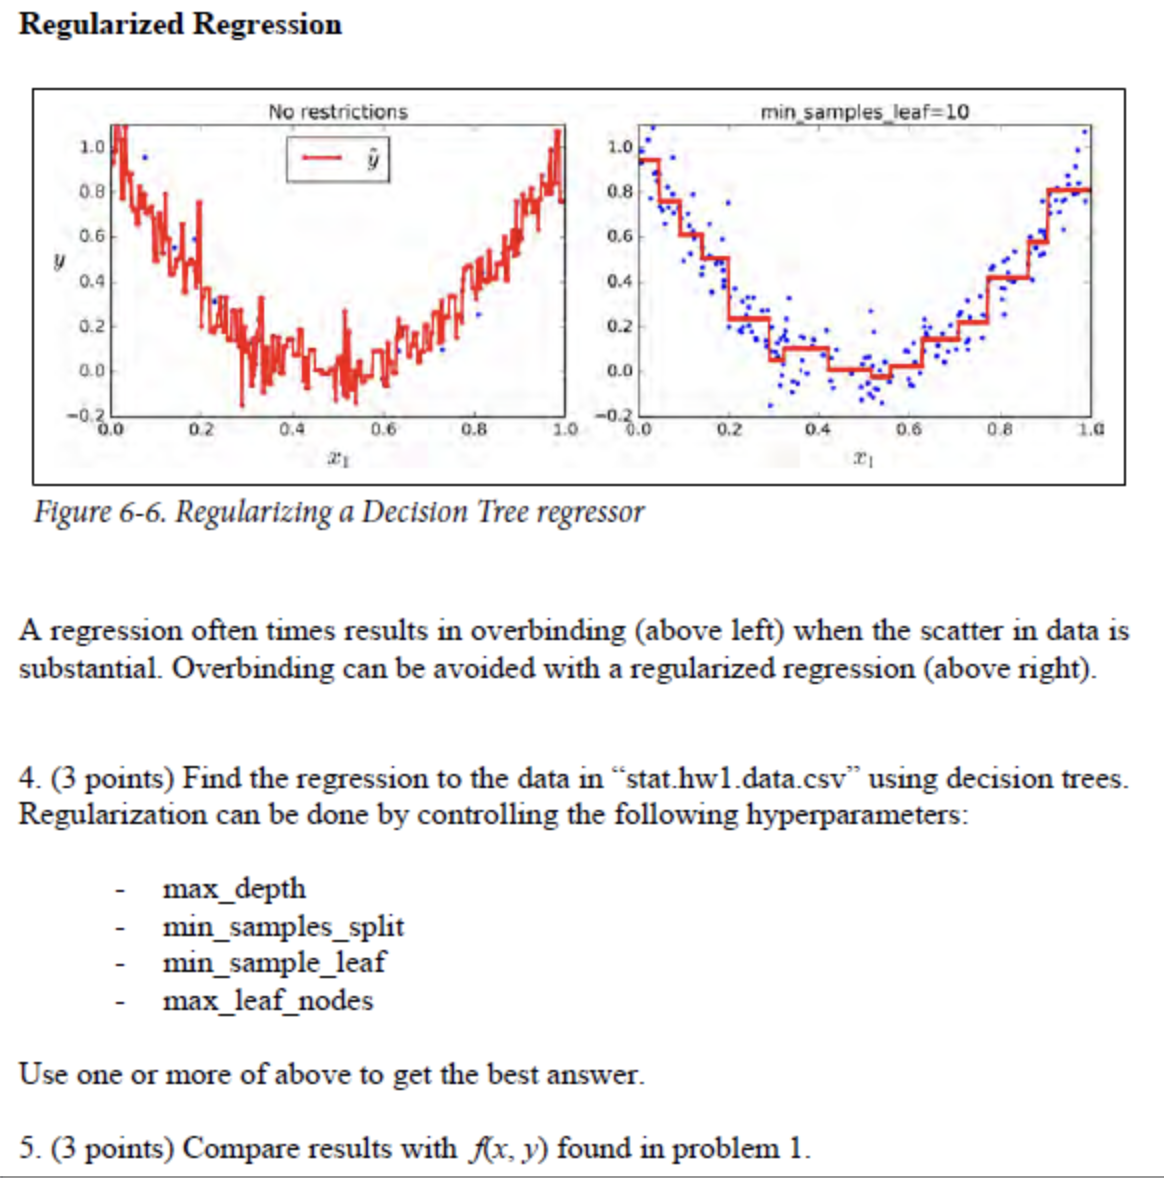

In [3]:
Image('스크린샷 2021-06-08 00.20.54.png')

<font color = 'red'>**Wrangling Import**

In [4]:
import pandas as pd
import numpy as np

<font color = 'red'> **Model Import**

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.svm import SVR, LinearSVR

<font color = 'red'> **Data Split Import**

In [6]:
from sklearn.model_selection import train_test_split

<font color = 'red'> **Evaluation Import**

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

<font color = 'red'> **Plotting Import**

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

***

In [9]:
data = pd.read_csv('stat.hw1.data.csv', sep = '\t')

In [10]:
data.head()

,x,y,f_xy
0,2.476965,0.005516,17.728721
1,1.977588,1.568847,13.216848
2,0.484978,2.703197,13.977493
3,2.498437,2.726071,44.647484
4,2.619270,0.131029,19.970821


## 1. Determine$f(x, y) = ax^m + by^n$ using two of the regularized regressors
### 1-1. Ridge


In [11]:
from itertools import combinations # m, n의 최적 조합을 위해 조합 메서드 사용

In [12]:
comb = np.arange(1, 16) # m, n이 1부터 14의 정수
a_list = []
b_list = []
m_list = []
n_list = []
rmse_list =[]

for i in combinations(comb, 2) : # m, n 조합 생성 / 15C2 로 105개의 조합 생성
    
    df = data.copy() # 기존 데이터가 바뀌면 안되므로 별도의 변수에 원본데이터를 복사해서 저장

    m = i[0] # 지수 m
    n = i[1] # 지수 n
    
    df['x'] **= m # x 변수에 m 거듭제곱
    df['y'] **= n # y 변수에 n 거듭제곱
    
    ### 데이터를 75 : 25 비율로 분할
    X_train, X_test, y_train, y_test = train_test_split(df[['x', 'y']], df['f_xy'], random_state = 608, test_size = .25, shuffle = True)
    
    ### 릿지 모델 생성
    ridge = Ridge()
    
    ### train 데이터 학습
    ridge.fit(X_train, y_train)
    
    ### test 데이터 예측
    pred = ridge.predict(X_test)
    
    ### 실제 값과 예측 값 RMSE 산출
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    
    ### rmse 리스트에 추가
    rmse_list.append(rmse)
    
    a = ridge.coef_[0] # a계수
    b = ridge.coef_[1] # b계수
    
    ### DataFrame 형식으로 저장하기 위해 리스트에 저장
    a_list.append(a)
    b_list.append(b)
    m_list.append(m)
    n_list.append(n)
    print(f'When m = {i[0]} and n = {i[1]}, a = {round(a, 3)}  b = {round(b, 3)} RMSE = {round(rmse, 3)}')

When m = 1 and n = 2, a = 9.172  b = 2.725 RMSE = 3.73
When m = 1 and n = 3, a = 9.164  b = 0.97 RMSE = 3.643
When m = 1 and n = 4, a = 9.144  b = 0.339 RMSE = 3.851
When m = 1 and n = 5, a = 9.123  b = 0.117 RMSE = 4.162
When m = 1 and n = 6, a = 9.102  b = 0.04 RMSE = 4.485
When m = 1 and n = 7, a = 9.084  b = 0.014 RMSE = 4.788
When m = 1 and n = 8, a = 9.069  b = 0.005 RMSE = 5.059
When m = 1 and n = 9, a = 9.057  b = 0.002 RMSE = 5.298
When m = 1 and n = 10, a = 9.048  b = 0.001 RMSE = 5.508
When m = 1 and n = 11, a = 9.041  b = 0.0 RMSE = 5.691
When m = 1 and n = 12, a = 9.035  b = 0.0 RMSE = 5.851
When m = 1 and n = 13, a = 9.03  b = 0.0 RMSE = 5.992
When m = 1 and n = 14, a = 9.027  b = 0.0 RMSE = 6.116
When m = 1 and n = 15, a = 9.024  b = 0.0 RMSE = 6.227
When m = 2 and n = 3, a = 3.014  b = 0.99 RMSE = 3.354
When m = 2 and n = 4, a = 3.009  b = 0.346 RMSE = 3.62
When m = 2 and n = 5, a = 3.002  b = 0.119 RMSE = 3.98
When m = 2 and n = 6, a = 2.995  b = 0.041 RMSE = 4.34
When

#### 각각의 m, n, a, b 조합과 해당 조합의 RMSE를 데이터 프레임으로 저장

In [13]:
func_comb = pd.DataFrame({'m' : m_list, 'a' : a_list, 'n' : n_list, 'b' : b_list, 'RMSE' : rmse_list})
min_rmse = func_comb[func_comb.RMSE == func_comb.RMSE.min()] # RMSE가 가장 작은 행 추출
display(min_rmse)
print(f'When RMSE is the lowest, m = {min_rmse.m.loc[14]} n = {min_rmse.n.loc[14]} a = {min_rmse.a.loc[14]} b = {min_rmse.b.loc[14]}')

,m,a,n,b,RMSE
14,2,3.014113,3,0.990099,3.353858


When RMSE is the lowest, m = 2 n = 3 a = 3.0141129968100864 b = 0.9900993761389307


Ridge 알고리즘을 사용할 경우 위와 같은 조합이 최적의 조합으로 나타난다.

### 1-2. Lasso

In [14]:
comb = np.arange(1, 16) # m, n이 1부터 14의 정수
a_list = []
b_list = []
m_list = []
n_list = []
rmse_list =[]

for i in combinations(comb, 2) : # m, n 조합 생성 / 15C2 로 105개의 조합 생성
    
    df = data.copy() # 기존 데이터가 바뀌면 안되므로 별도의 변수에 원본데이터를 복사해서 저장

    m = i[0] # 지수 m
    n = i[1] # 지수 n
    
    df['x'] **= m # x 변수에 m 거듭제곱
    df['y'] **= n # y 변수에 n 거듭제곱
    
    ### 데이터를 75 : 25 비율로 분할
    X_train, X_test, y_train, y_test = train_test_split(df[['x', 'y']], df['f_xy'], random_state = 608, test_size = .25, shuffle = True)
    
    ### 릿지 모델 생성
    lasso = Lasso()
    
    ### train 데이터 학습
    lasso.fit(X_train, y_train)
    
    ### test 데이터 예측
    pred = lasso.predict(X_test)
    
    ### 실제 값과 예측 값 RMSE 산출
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    
    ### rmse 리스트에 추가
    rmse_list.append(rmse)
    
    a = lasso.coef_[0] # a계수
    b = lasso.coef_[1] # b계수
    
    ### DataFrame 형식으로 저장하기 위해 리스트에 저장
    a_list.append(a)
    b_list.append(b)
    m_list.append(m)
    n_list.append(n)
    print(f'When m = {i[0]} and n = {i[1]}, a = {round(a, 3)}  b = {round(b, 3)} RMSE = {round(rmse, 3)}')

When m = 1 and n = 2, a = 7.89  b = 2.568 RMSE = 3.818
When m = 1 and n = 3, a = 7.888  b = 0.949 RMSE = 3.681
When m = 1 and n = 4, a = 7.871  b = 0.336 RMSE = 3.868
When m = 1 and n = 5, a = 7.85  b = 0.116 RMSE = 4.174
When m = 1 and n = 6, a = 7.829  b = 0.04 RMSE = 4.501
When m = 1 and n = 7, a = 7.812  b = 0.014 RMSE = 4.809
When m = 1 and n = 8, a = 7.797  b = 0.005 RMSE = 5.086
When m = 1 and n = 9, a = 7.785  b = 0.002 RMSE = 5.331
When m = 1 and n = 10, a = 7.776  b = 0.001 RMSE = 5.546
When m = 1 and n = 11, a = 7.768  b = 0.0 RMSE = 5.733
When m = 1 and n = 12, a = 7.762  b = 0.0 RMSE = 5.897
When m = 1 and n = 13, a = 7.758  b = 0.0 RMSE = 6.041
When m = 1 and n = 14, a = 7.754  b = 0.0 RMSE = 6.169
When m = 1 and n = 15, a = 7.752  b = 0.0 RMSE = 6.281
When m = 2 and n = 3, a = 2.882  b = 0.97 RMSE = 3.311
When m = 2 and n = 4, a = 2.879  b = 0.344 RMSE = 3.576
When m = 2 and n = 5, a = 2.872  b = 0.119 RMSE = 3.939
When m = 2 and n = 6, a = 2.865  b = 0.041 RMSE = 4.303


#### 각각의 m, n, a, b 조합과 해당 조합의 RMSE를 데이터 프레임으로 저장

In [15]:
func_comb = pd.DataFrame({'m' : m_list, 'a' : a_list, 'n' : n_list, 'b' : b_list, 'RMSE' : rmse_list})
min_rmse = func_comb[func_comb.RMSE == func_comb.RMSE.min()] # RMSE가 가장 작은 행 추출
display(min_rmse)
print(f'When RMSE is the lowest, m = {min_rmse.m.loc[14]} n = {min_rmse.n.loc[14]} a = {min_rmse.a.loc[14]} b = {min_rmse.b.loc[14]}')

,m,a,n,b,RMSE
14,2,2.882343,3,0.96993,3.311475


When RMSE is the lowest, m = 2 n = 3 a = 2.8823426998814954 b = 0.9699301807626223


Lasso 알고리즘을 사용할 경우 위와 같은 조합이 최적의 조합으로 나타난다.

Ridge, Lasso 모두 m = 2, n = 3 일 때 성능이 가장 좋으므로 m, n을 각각 2, 3으로 고정한다.

***
## 2. Explain how the free parameter, e.g.  $\alpha$  in the cost function of ridge regression, is obtained.

In [16]:
data['x'] **= 2 # m은 2이므로 x 값을 제곱
data['y'] **= 3 # n은 3이므로 y 값을 세제곱

In [17]:
data.head()

,x,y,f_xy
0,6.135356,1.678312e-07,17.728721
1,3.910854,3.861373e+00,13.216848
2,0.235204,1.975300e+01,13.977493
3,6.242187,2.025870e+01,44.647484
4,6.860575,2.249584e-03,19.970821


#### Train & Test Split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data[['x', 'y']], data['f_xy'], random_state = 608, test_size = .25, shuffle = True)

In [19]:
rmse_list = []
a_list = []
for a in [10 ** (i) for i in range(-5, 5, 1)] : # 0.001부터 1000까지 10의 i제곱 수를 alpha의 범위로 설정
    ridge = Ridge(alpha = a) # alpha 값을 변화해가면서 모델 생성
    a_list.append(a)
    ridge.fit(X_train, y_train)
    pred = ridge.predict(X_test)
    rmse = mean_squared_error(y_test, pred) ** .5 # 루트를 씌우는 것으로 np.sqrt(mean_squared_error(y_test, pred))와 동일
    print(f'When alpha = {a}, RMSE = {rmse}')
    rmse_list.append(rmse)

When alpha = 1e-05, RMSE = 3.3540955535021912
When alpha = 0.0001, RMSE = 3.354095532081598
When alpha = 0.001, RMSE = 3.354095317875979
When alpha = 0.01, RMSE = 3.3540931758506516
When alpha = 0.1, RMSE = 3.354071758683814
When alpha = 1, RMSE = 3.3538578955795257
When alpha = 10, RMSE = 3.3517500414408716
When alpha = 100, RMSE = 3.333670134703477
When alpha = 1000, RMSE = 3.3803951838911526
When alpha = 10000, RMSE = 5.971792076448306


In [20]:
alpha_df = pd.DataFrame({'alpha' : a_list, 'RMSE' : rmse_list, 'idx' : [i for i in range(len(a_list))]})
alpha_df.sort_values(by = 'RMSE')

,alpha,RMSE,idx
7,100.00000,3.333670,7
6,10.00000,3.351750,6
5,1.00000,3.353858,5
4,0.10000,3.354072,4
3,0.01000,3.354093,3
2,0.00100,3.354095,2
1,0.00010,3.354096,1
0,0.00001,3.354096,0
8,1000.00000,3.380395,8
9,10000.00000,5.971792,9


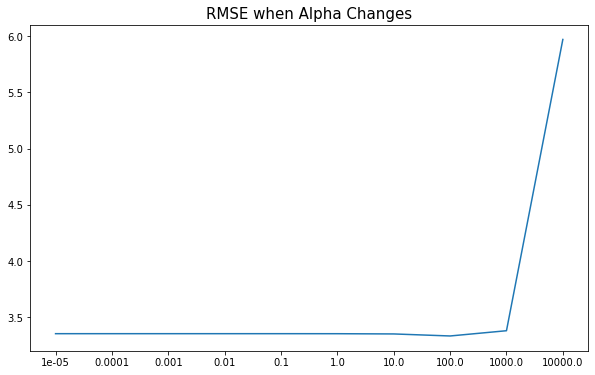

In [21]:
plt.figure(figsize = (10, 6))
plt.title('RMSE when Alpha Changes', size = 15)
plt.plot(alpha_df.idx, alpha_df.RMSE)
plt.xticks(np.arange(0, 10), alpha_df.alpha) # x축의 범례 값들을 위의 alpha 값으로 변환
plt.show()

Ridge의 경우 alpha 값이 커질경우 RMSE가 올라가 성능이 안좋아지는 것을 확인할 수 있습니다.

***
## 3. Compare the regressors that you use in terms of accuracy and efficiency

In [22]:
gb = GradientBoostingRegressor(random_state = 608)
rf = RandomForestRegressor(random_state = 608)
ridge = Ridge()
lasso = Lasso()
dtr = DecisionTreeRegressor(random_state = 608)
lsvr = LinearSVR()
svr = SVR()

총 7개의 모델을 활용하여 성능을 비교해보겠습니다.

In [23]:
models = [gb, rf, ridge, lasso, dtr, lsvr, svr]

loop 문을 활용하기 위해 각 모델을 리스트에 저장합니다.

In [24]:
rmse_list = []
for model in models :
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, pred) ** .5
    rmse_list.append(rmse)

/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


모델별로 데이터를 학습한 후 test 데이터를 예측하고 RMSE를 계산합니다.

In [25]:
model_score = pd.DataFrame({'model' : [m.__class__.__name__ for m in models], 'RMSE' : rmse_list})
model_score

,model,RMSE
0,GradientBoostingRegressor,3.707585
1,RandomForestRegressor,3.562304
2,Ridge,3.353858
3,Lasso,3.311475
4,DecisionTreeRegressor,4.517643
5,LinearSVR,3.392125
6,SVR,3.525715


In [26]:
import seaborn as sns # matplotlib을 기반으로한 시각화 패키지

모델별 RMSE를 시각화해보도록 하겠습니다.

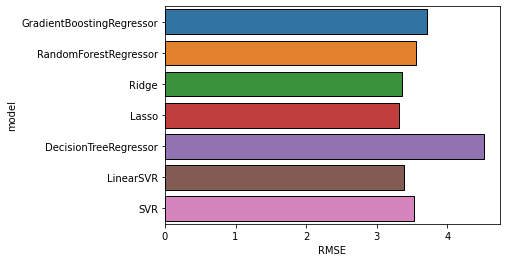

In [27]:
sns.barplot(y = model_score.model, x = model_score.RMSE, edgecolor = (0, 0, 0))
plt.show()

***
## 4. Find the regression to the data in "stat.hw1.data.csv" using decision trees. Regularization can be done by controlling the following hyperparameters.

In [34]:
dtr = DecisionTreeRegressor(random_state = 608, max_depth = 3)

In [35]:
dtr.get_params() # 기본 파라미터 확인

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 608,
 'splitter': 'best'}

DecisionTreeRegressor의 기본 파라미터입니다.

문제에서 하이퍼 파라미터로 제시된 max_depth, min_sample_leaf, min_samples_split, max_leaf_nodes의 개별값은 위에서 확인할 수 있습니다.

그렇다면 기본 파라미터로 세팅된 모델의 성능을 평가해보도록 하겠습니다.

In [36]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=608)

#### <font color = 'red'>DecisionTreeRegressor 가지치기 시각화

In [37]:
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO

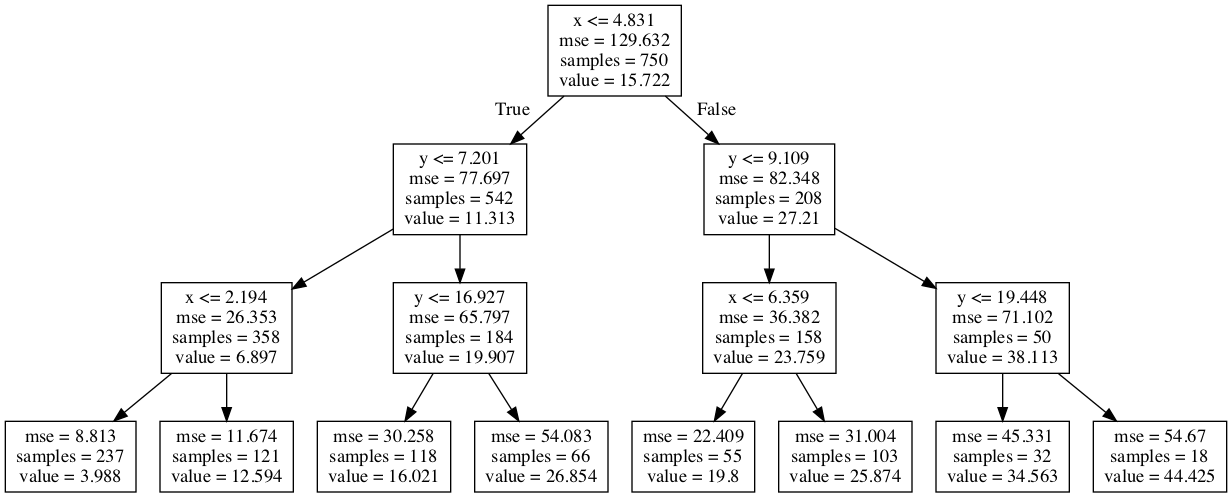

In [38]:
dot_data = StringIO()
export_graphviz(dtr, out_file = dot_data, feature_names = ['x', 'y'])

graph = pydotplus.pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("dtr.png")
Image(filename = 'dtr.png')

의사결정나무는 기본적으로 if-then 방식을 사용하는데 실제 데이터 학습 및 예측 과정은 위와 같습니다.

기본 파라미터로 세팅된 의사결정나무의 성능은 위와 같습니다.

그렇다면 각 파라미터를 튜닝하면서 성능을 확인해보도록 하겠습니다.

In [33]:
params = {'max_depth' : np.arange(1, 9), 'min_samples_split' : [2 ** i for i in range(1, 7)],
          'min_samples_leaf' : [2 ** i for i in range(1, 7)], 'max_leaf_nodes' : [2 ** i for i in range(1, 7)]}

#### <font color = 'blue' >< 파라미터 세팅 > <font color = 'black'>
- max_depth = 1부터 9까지의 정수
- min_samples_split = 2부터 32까지의 2의 거듭제곱 수
- max_leaf_nodes = 2부터 32까지의 2의 거듭제곱 수
- min_samples_leaf = 2부터 32까지의 2의 거듭제곱 수
    
아래 코드를 통해 각 파라미터 값의 변화에 따라 성능이 어떻게 달라지는지 확인해보겠습니다.

In [219]:
param_list = []
mae_list = []
mse_list = []
rmse_list = []
value_list = []
for p in list(params.keys()) :
    print(f'PARAMETER is {p}\n')
    for v in params[p] : # 각 파라미터에 할당된 값 추출
        param = {p : v} # {'max_depth' : 3} 과 같은 형식으로 딕셔너리 생성
        param_list.append(p) # 딕셔너리의 키를 리스트에 저장
        value_list.append(v) # 딕셔너리의 값을 리스트에 저장
        dtr = DecisionTreeRegressor(random_state = 608, **param) # **은 unpacking으로 param에 할당된 파라미터를 인수로 자동 배분
        dtr.fit(X_train, y_train)
        pred = dtr.predict(X_test)
        mae = mean_absolute_error(y_test, pred)
        mse = mean_squared_error(y_test, pred)
        rmse = mse ** .5
        print(f'When {p} = {v}, MAE = {mae} / MSE = {mse} / RMSE = {rmse}')
        mae_list.append(mae)
        mse_list.append(mse)
        rmse_list.append(rmse)
    print('\n')

PARAMETER is max_depth

When max_depth = 1, MAE = 7.64844962817691 / MSE = 87.66652884067436 / RMSE = 9.363040576686313
When max_depth = 2, MAE = 5.18933896229463 / MSE = 39.88114778266467 / RMSE = 6.315152237489186
When max_depth = 3, MAE = 3.617782454890652 / MSE = 22.700197631282467 / RMSE = 4.764472439975119
When max_depth = 4, MAE = 3.167202832787383 / MSE = 17.12325184437396 / RMSE = 4.138025114033741
When max_depth = 5, MAE = 3.0207378963527645 / MSE = 16.36456690447261 / RMSE = 4.045314191070035
When max_depth = 6, MAE = 2.769457487545697 / MSE = 14.92566508686644 / RMSE = 3.863374831266886
When max_depth = 7, MAE = 2.879651949297775 / MSE = 16.585099378487275 / RMSE = 4.072480740100225
When max_depth = 8, MAE = 2.918954224583466 / MSE = 17.390107254102585 / RMSE = 4.170144752176186


PARAMETER is min_samples_split

When min_samples_split = 2, MAE = 3.0944435400000003 / MSE = 20.409096701593025 / RMSE = 4.517642825810051
When min_samples_split = 4, MAE = 2.959644928 / MSE = 18.

한눈에 보기 위해 데이터프레임으로 변경하고 RMSE 기준으로 성능순으로 7개의 샘플만 확인해보겠습니다.

In [220]:
param_score = pd.DataFrame({'parameter' : param_list, 'value' : value_list, 'MAE' : mae_list, 'MSE' : mse_list, 'RMSE' : rmse_list})
param_score.sort_values(by = 'RMSE').head(7)

,parameter,value,MAE,MSE,RMSE
16,min_samples_leaf,8,2.521005,12.734893,3.568598
17,min_samples_leaf,16,2.675319,14.157844,3.762691
15,min_samples_leaf,4,2.652632,14.416387,3.796892
11,min_samples_split,16,2.747643,14.867383,3.855825
5,max_depth,6,2.769457,14.925665,3.863375
12,min_samples_split,32,2.788562,15.315128,3.913455
24,max_leaf_nodes,32,2.899864,15.653413,3.956439


RMSE를 기준으로 min_samples_leaf가 8일 때 RMSE가 가장 낮은 것을 확인하였습니다.

단일 파라미터만 조정하지 않고 전체 파라미터의 조합을 바꿔가면서 최적의 조합을 찾아보도록 하겠습니다. 

In [221]:
from sklearn.model_selection import GridSearchCV

data를 10개 세트로 나누어 9개 세트로 학습을 1개 세트로 검증을 수행하여 평균 RMSE가 가장 낮을 때의 파라미터 조합을 탐색해 보겠습니다.

In [222]:
cv = GridSearchCV(model1, params, cv = 10, scoring = 'neg_mean_squared_error')

In [ ]:
cv.fit(X_train, y_train)

In [ ]:
print(f'RMSE After Hyper-parameter tuning is {np.sqrt(abs(cv.score(X_test, y_test)))}')

min_samples_leaf만 8로 조정했을 때의 성능 보다 약간 떨어지는 것을 알 수 있습니다.

***
## 5. Compare results with $f(x, y)$ found in problem 1

1번 문제에서 Lasso를 사용하였을 때 RMSE가 3.31이었으며 다른 알고리즘들의 성능과 파라미터를 조정한 의사결정나무와의 성능을 비교했을 때 더 우수한 결과를 발견하지 못했습니다.

$f(x, y)$가 x와 y의 비선형 결합으로 되어 있기 때문에 선형 회귀에 기반을 하고 있는 Ridge와 Lasso가 성능이 뛰어나다고 할 수 있습니다.